In [50]:
import sys
sys.path.append('/scratch/gf332/Misc/BVAE/code')

import tensorflow as tf
import tensorflow_probability as tfp

from sghmc import SGHMC

import matplotlib.pyplot as plt

from tqdm import trange

tfd = tfp.distributions

In [73]:
target_dist = tfd.MultivariateNormalTriL(loc=tf.zeros(2),
                                         scale_tril=tf.linalg.cholesky(tf.constant([[1., 0.],
                                                                                   [0.95, 1.]])))

In [81]:
sghmc = SGHMC(learning_rate=1e-3,
              data_size=1,
              momentum_decay=0.05)

In [82]:
theta = tf.Variable(10. * tf.ones(2), name="theta")

keep_every = 5

samples = []

for i in trange(1500):
    
    with tf.GradientTape() as tape:
        
        loss = target_dist.log_prob(theta)
        
    grads = tape.gradient(loss, (theta,))
    sghmc.apply_gradients(zip(grads, (theta,)))
    
    if any(tf.reduce_any(tf.math.is_nan(g)) for g in grads):
        print("grad was nan")
        break
    
    if i > 0 and i % keep_every == 0:
        samples.append(theta.numpy())
        
samples = tf.stack(samples)

100%|██████████| 1500/1500 [00:11<00:00, 132.63it/s]


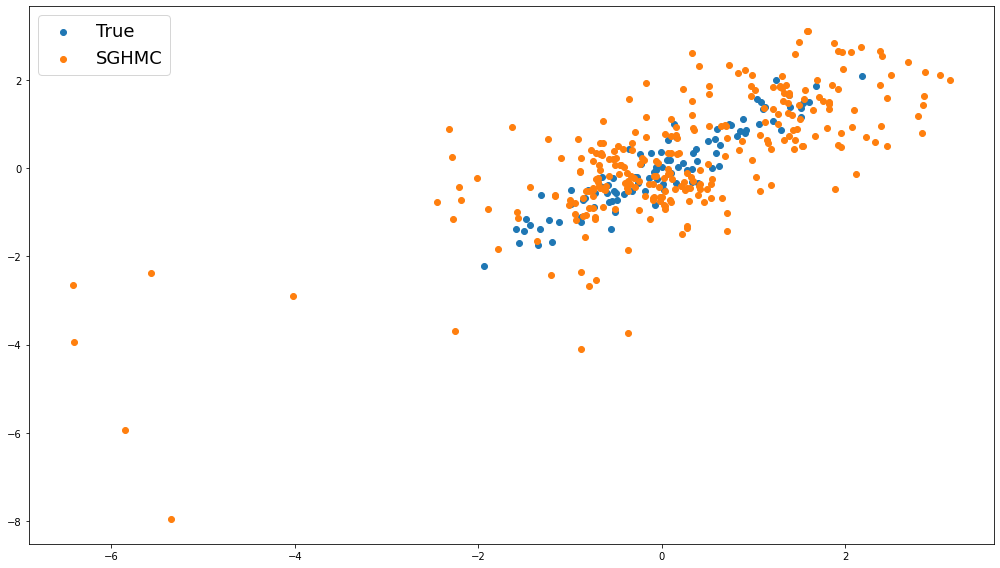

In [89]:
true_samples = target_dist.sample(100)

burnin = 20

plt.figure(figsize=(14, 8))

plt.scatter(true_samples[:, 0], true_samples[:, 1], label="True",)
plt.scatter(samples[burnin:, 0], samples[burnin:, 1], label="SGHMC")

plt.legend(fontsize=18)

plt.tight_layout()

plt.savefig("../plots/sghmc_bivariate_gaussian.png")
plt.show()